In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

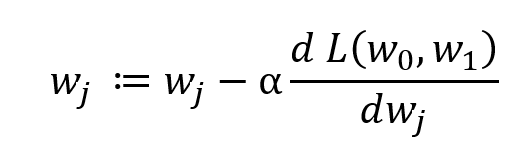
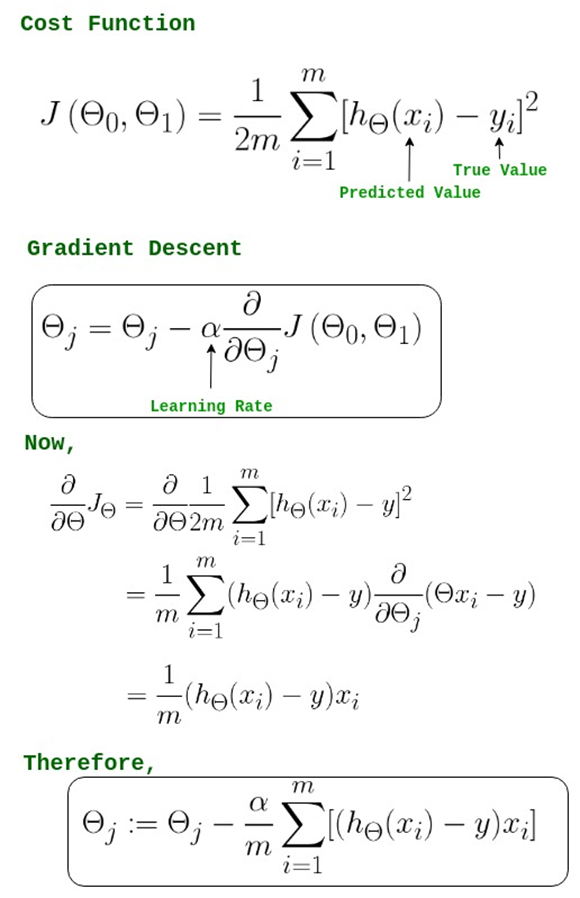

In [ ]:
class LinearRegression:
  def __init__(self):
    self.mu = []
    self.std = []
  
  def y_pred(self, x, w):
	  return np.matmul(x, w)
 
  def cost_function(self, x, y, w):
	  return ((self.y_pred(x, w)-y).T@(self.y_pred(x, w)-y))/(2*y.shape[0])
  
  def gradient_descent(self, x, y, w, learning_rate=0.1, num_epochs=10):
	  m = x.shape[0]
	  L_all = []

	  for i in range(num_epochs):
	  	h_x = self.y_pred(x, w)
	  	cost = (1/m)*(x.T@(h_x - y))
	  	w = w - (learning_rate)*cost
	  	L_all.append(self.cost_function(x, y, w))

	  return w, L_all 
	
  def load_data(self, filename):
    df = pd.read_csv(filename, sep=",", index_col=False, header=None)
    data = np.array(df, dtype=float)
    self.normalize(data)
    y = np.reshape(data[:, -1], (data.shape[0],1))
    x = data[:,:data.shape[1]-1]
    x = np.hstack((np.ones((x.shape[0],1)), x))
    return x, y

  def normalize(self,data):
  	for i in range(0,data.shape[1]-1):
  		mean_x = np.mean(data[:,i])
  		std_x = np.std(data[:, i])
  		data[:,i] = (data[:,i] - mean_x)/std_x
  		self.mu.append(mean_x)
  		self.std.append(std_x)
  def out_put(self, x):
  	for i in range(len(x)):
  		x[i] = (x[i] - self.mu[i])/self.std[i]
  
  	y = self.w[0]
  	for i in range(1, len(x)+1):
  		y += self.w[i]*x[i-1]
  	return y
  
  def train(self, x, y, learning_rate=0.1, num_epochs = 50):
    w_tmp = np.zeros((x.shape[1], 1))
    self.w , self.L_all = self.gradient_descent(x, y, w_tmp, learning_rate, num_epochs)
  

In [ ]:
ln = LinearRegression()
x_1,y_1 = ln.load_data("house_price_data.txt")
ln.train(x_1,y_1,0.1,50)
print(ln.out_put([1600, 3]))

In [ ]:
# house_price_data.txt
# 2104,3,399900
# 1600,3,329900
# 2400,3,369000
# 1416,2,232000
# 3000,4,539900
# 1985,4,299900
# 1534,3,314900
# 1427,3,198999
# 1380,3,212000
# 1494,3,242500
# 1940,4,239999
# 2000,3,347000
# 1890,3,329999
# 4478,5,699900
# 1268,3,259900
# 2300,4,449900
# 1320,2,299900
# 1236,3,199900
# 2609,4,499998
# 3031,4,599000
# 1767,3,252900
# 1888,2,255000
# 1604,3,242900
# 1962,4,259900
# 3890,3,573900
# 1100,3,249900
# 1458,3,464500
# 2526,3,469000
# 2200,3,475000
# 2637,3,299900
# 1839,2,349900
# 1000,1,169900
# 2040,4,314900
# 3137,3,579900
# 1811,4,285900
# 1437,3,249900
# 1239,3,229900
# 2132,4,345000
# 4215,4,549000
# 2162,4,287000
# 1664,2,368500
# 2238,3,329900
# 2567,4,314000
# 1200,3,299000
# 852,2,179900
# 1852,4,299900
# 1203,3,239500